In [192]:
import xarray as xr
import cdsapi
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
from scipy.stats import pearsonr

In [47]:
#Api para download direto dos dados
c = cdsapi.Client()

In [63]:
c.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            'geopotential', 'ozone_mass_mixing_ratio', 'potential_vorticity',
            'temperature', 'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': [
            '1', '10', '20',
            '30', '50',
        ],
        'year': '2020',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            0, -180, -90,
            180,
        ],
    },
    'data.nc')

/home/vlsantos/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-10-15 17:58:30,491 INFO Welcome to the CDS
2021-10-15 17:58:30,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
/home/vlsantos/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-10-15 17:58:30,816 INFO Downloading https://download-0003.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1

Result(content_length=374294756,content_type=application/x-netcdf,location=https://download-0003.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1634331231.9509938-4224-14-8652c5d6-8521-4dd9-837e-f0ea95b71593.nc)

In [254]:
#Abrindo e selecionando os dados
dad = xr.open_dataset('data.nc')
lat = dad.latitude.values
lon = dad.longitude.values
#Cáclulando a velocidade do vento
u = np.array(dad['v'][0,4,:,:])
v = np.array(dad['u'][0,4,:,:])
speed = np.hypot(u, v)

In [247]:
##Cálculando correlação
da = xr.open_dataset('data.nc')
pv = np.array(da['pv'][11,4,:,:])
o = np.array(da['o3'][11,4,:,:])
r = np.corrcoef(o, pv)

/home/vlsantos/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/vlsantos/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Correlação média menssal Ozônio e Vorticidade Potêncial, 50hpa - Dez/2020')

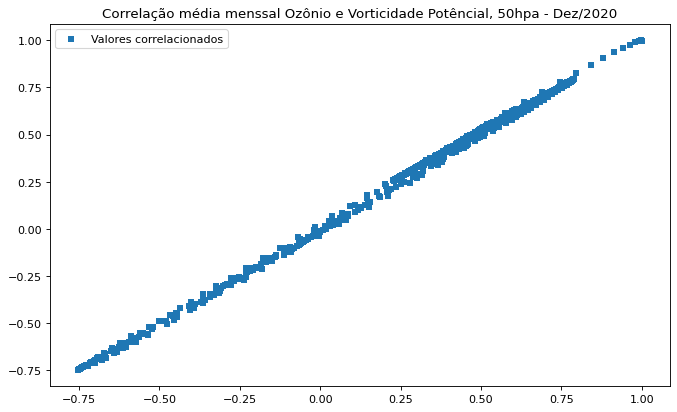

In [252]:
#Visualizando correlação calculada 
r1 = r[0]
r2 = r[1]
fig=plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(r1,r2,linewidth=0, marker='s', label='Valores correlacionados')
plt.legend(facecolor='white')
plt.title('Correlação média menssal Ozônio e Vorticidade Potêncial, 50hpa - Dez/2020')

In [210]:
#Cálculando correlação
r = np.corrcoef(x, y)

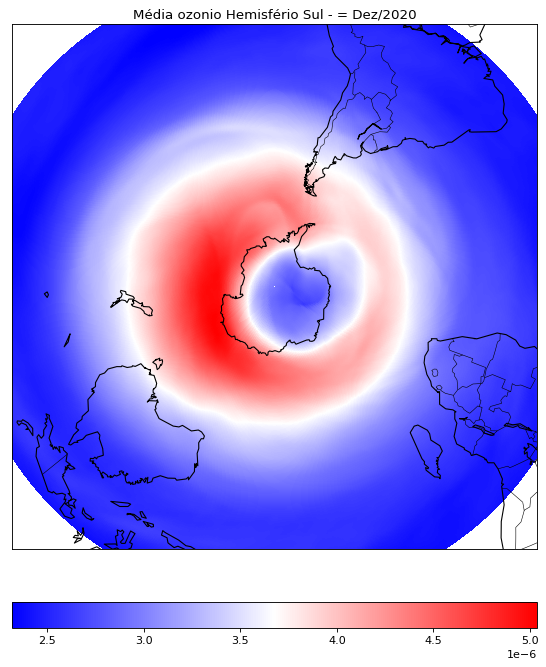

In [185]:
dad = xr.open_dataset('data.nc')
dad = dad['o3'][11,4,:,:]
fig=plt.figure(figsize=(10,10), dpi= 80)
m = Basemap(projection ='spstere',boundinglat=-10,lon_0=90,resolution='c')
m.drawcountries()
m.drawcoastlines()
lons,lats = np.meshgrid(lon,lat)
x,y = m(lons,lats)
c_scheme = m.pcolor(x,y,dad,cmap = 'bwr')
cbar = m.colorbar(c_scheme, location = 'bottom', pad = '10%')
plt.title('Média ozonio Hemisfério Sul - = Dez/2020')   
fig.savefig('dez.png', dpi=200) 

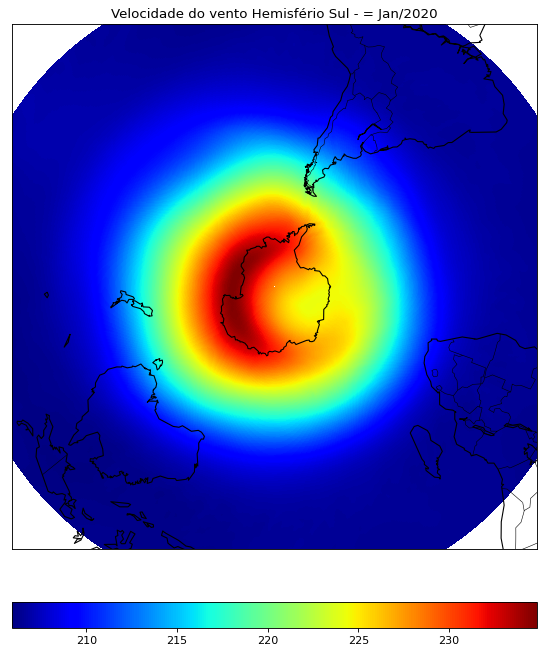

In [259]:
dad = xr.open_dataset('data.nc')
dad = dad['t'][11,4,:,:]
fig=plt.figure(figsize=(10,10), dpi= 80)
m = Basemap(projection ='spstere',boundinglat=-10,lon_0=90,resolution='c')
m.drawcountries()
m.drawcoastlines()
lons,lats = np.meshgrid(lon,lat)
x,y = m(lons,lats)
c_scheme = m.pcolor(x,y,dad,cmap = 'jet')
cbar = m.colorbar(c_scheme, location = 'bottom', pad = '10%')
plt.title('Velocidade do vento Hemisfério Sul - = Jan/2020')   
plt.show()

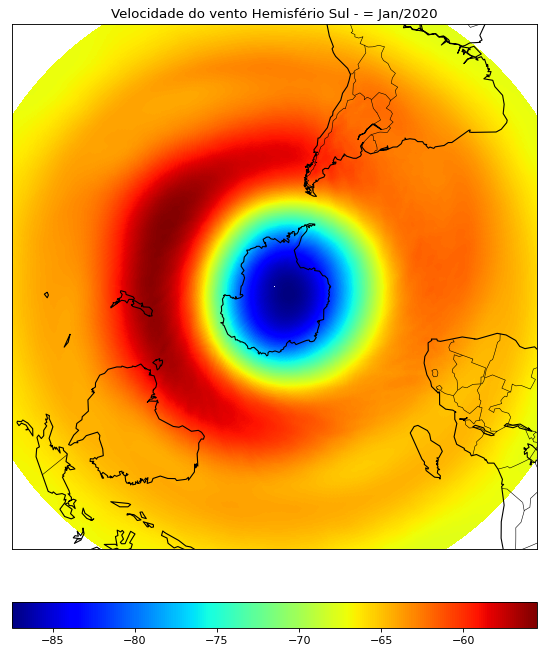

In [262]:
#Visualizando temperatura
dad = xr.open_dataset('data.nc')
dad = dad['t'][5,4,:,:]
dad = dad-273.15
fig=plt.figure(figsize=(10,10), dpi= 80)
m = Basemap(projection ='spstere',boundinglat=-10,lon_0=90,resolution='c')
m.drawcountries()
m.drawcoastlines()
lons,lats = np.meshgrid(lon,lat)
x,y = m(lons,lats)
c_scheme = m.pcolor(x,y,dad,cmap = 'jet')
cbar = m.colorbar(c_scheme, location = 'bottom', pad = '10%')
plt.title('Velocidade do vento Hemisfério Sul - = Jan/2020')   
plt.show()